# notebook for making simple vorticity snapshots

In [11]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import cmasher
%matplotlib inline
plt.rcParams["font.size"] = 14
plt.rcParams['text.usetex'] = False
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['font.family'] = 'Dejavu Serif'

In [12]:
# params
nx = 500
ny = 500
dx = 2000
dy = 2000
nxP1 = nx+1
nyP1 = ny+1

g = 9.81
rhoConst = 1029
f0 = 1.4e-4

conc = ["0", "20", "40", "60", "80", "100"]
loadLoc = "/scratch/hcm7920/amb"
saveLoc = "/home/hcm7920/experiments/arcticMiddepthBI/plots/"

ts = np.array([40,60])
levs = [0,11,22]
nSnapshots = len(ts)
nLevs = len(levs)

myCmap = cmasher.waterlily
iceCmap = cmasher.arctic

In [13]:
# initialize arrays

vortSnapshots = np.zeros(shape=(len(conc), nSnapshots, nLevs, ny-1, nx-1))
iceSnapshots = np.zeros(shape=(len(conc), nSnapshots, ny, nx))


In [14]:
# load data

for ic in range(len(conc)):
  data = nc.Dataset(loadLoc+conc[ic]+"/data/sice.nc")
  iceSnapshots[ic,:,:,:] = data["si_AREA"][ts+1,:,:]

testTime = data["T"]

for ic in range(len(conc)):
  data = nc.Dataset(loadLoc+conc[ic]+"/data/diagsSnapshots.nc")
  vortSnapshots[ic,:,:,:,:] = data["momVort3"][ts,levs,1:-1,1:-1]/f0


time = data["T"]
data = nc.Dataset(loadLoc+"0/data/state.nc")
depth = data["Z"]
xGrid = nc.Dataset(loadLoc+"0/data/diagsSnapshots.nc")["Xp1"][1:-1]/1000
yGrid = nc.Dataset(loadLoc+"0/data/diagsSnapshots.nc")["Yp1"][1:-1]/1000
yGrid -= 499
xGridIce = nc.Dataset(loadLoc+"0/data/diagsSnapshots.nc")["X"][:]/1000
yGridIce = nc.Dataset(loadLoc+"0/data/diagsSnapshots.nc")["Y"][:]/1000
yGridIce -= 500

In [15]:
time[10]-testTime[11]

-216000.0

In [16]:
ts+1

array([41, 61])

In [17]:

# figure for ice free, surface

# myMax = abs(vortSnapshots[0,:,0,:,:]).max()

# fig, axs = plt.subplots(1,4,figsize=(20,5),
#                        sharey=True, layout="constrained")
# for it in range(nSnapshots):
#     im = axs[it].contourf(xGrid, yGrid, 
#                           vortSnapshots[0,it,0,:,:],
#                           100,
#                           cmap=myCmap,
#                           vmax=myMax, vmin=-myMax)
#     axs[it].set_xlabel("Along channel distance (km)")

# axs[0].set_ylabel("Across channel distance (km)")
# cbar = plt.colorbar(im, ax=axs[3])
# fig.suptitle("Surface vorticity, ice free simulation", fontsize=18)

# # figure for ice free, at depth
# myMax = abs(vortSnapshots[0,:,2,:,:]).max()

# fig, axs = plt.subplots(1,4,figsize=(20,5),
#                        sharey=True, layout="constrained")
# for it in range(nSnapshots):
#     im = axs[it].contourf(xGrid, yGrid, 
#                           vortSnapshots[0,it,2,:,:],
#                           100,
#                           cmap=myCmap,
#                           vmax=myMax, vmin=-myMax)
#     axs[it].set_xlabel("Along channel distance (km)")

# axs[0].set_ylabel("Across channel distance (km)")
# cbar = plt.colorbar(im, ax=axs[3])
# fig.suptitle("Halocline vorticity, ice free simulation", fontsize=18)

# # figure for max ice, at surface
# myMax = abs(vortSnapshots[1,:,0,:,:]).max()

# fig, axs = plt.subplots(1,4,figsize=(20,5),
#                        sharey=True, layout="constrained")
# for it in range(nSnapshots):
#     im = axs[it].contourf(xGrid, yGrid, 
#                           vortSnapshots[1,it,0,:,:],
#                           100,
#                           cmap=myCmap,
#                           vmax=myMax, vmin=-myMax)
#     axs[it].set_xlabel("Along channel distance (km)")

# axs[0].set_ylabel("Across channel distance (km)")
# cbar = plt.colorbar(im, ax=axs[3])
# fig.suptitle("Surface vorticity, max ice simulation", fontsize=18)

# # figure for ice free, at depth
# myMax = abs(vortSnapshots[1,:,2,:,:]).max()

# fig, axs = plt.subplots(1,4,figsize=(20,5),
#                        sharey=True, layout="constrained")
# for it in range(nSnapshots):
#     im = axs[it].contourf(xGrid, yGrid, 
#                           vortSnapshots[1,it,2,:,:],
#                           100,
#                           cmap=myCmap,
#                           vmax=myMax, vmin=-myMax)
#     axs[it].set_xlabel("Along channel distance (km)")

# axs[0].set_ylabel("Across channel distance (km)")
# cbar = plt.colorbar(im, ax=axs[3])
# fig.suptitle("Halocline vorticity, max ice simulation", fontsize=18)


In [18]:
# panel of four snapshots, each from different runs

# fig, axs = plt.subplots(2,2,figsize=(16,16), 
#                         sharey=True, sharex=True,
#                         layout="constrained")

# iceMax = abs(vortSnapshots[1,:,:,:,:]).max()*0.5
# freeMax = abs(vortSnapshots[0,:,:,:,:]).max()*0.5
# iceContourLevs = np.linspace(-iceMax, iceMax, 150)
# freeContourLevs = np.linspace(-freeMax, freeMax, 150)

# im1 = axs[0,0].contourf(xGrid, yGrid, 
#                         vortSnapshots[0,it,0,:,:],
#                         freeContourLevs,
#                         cmap=myCmap, extend='both')
# im2 = axs[0,1].contourf(xGrid, yGrid, 
#                         vortSnapshots[0,it,1,:,:],
#                         freeContourLevs,
#                         cmap=myCmap, extend='both')
# im3 = axs[1,0].contourf(xGrid, yGrid, 
#                         vortSnapshots[1,it,0,:,:],
#                         iceContourLevs,
#                         cmap=myCmap, extend='both')
# im4 = axs[1,1].contourf(xGrid, yGrid, 
#                         vortSnapshots[1,it,1,:,:],
#                         iceContourLevs,
#                         cmap=myCmap, extend='both')

# cbar1 = plt.colorbar(im1, ax=axs[0,1],
#                      shrink=0.85,
#                      ticks=[-freeMax,0,freeMax])
# cbar2 = plt.colorbar(im3, ax=axs[1,1],
#                      shrink=0.85,
#                      ticks=[-iceMax,0,iceMax])

# cbar1.ax.set_yticklabels([str(-freeMax.round(2)), "0", str(freeMax.round(2))])
# cbar2.ax.set_yticklabels([str(-iceMax.round(2)), "0", str(iceMax.round(2))])
# cbar1.ax.set_title("$\zeta / \mathrm{f}_0$")
# cbar2.ax.set_title("$\zeta / \mathrm{f}_0$")

# axs[0,0].set_title("Surface, ice free")
# axs[0,1].set_title("Halocline, ice free")
# axs[1,0].set_title("Surface, max ice")
# axs[1,1].set_title("Halocline, max ice")

# axs[0,0].set_ylabel("Across channel distance (km)")
# axs[1,0].set_ylabel("Across channel distance (km)")
# axs[1,0].set_xlabel("Along channel distance (km)")
# axs[1,1].set_xlabel("Along channel distance (km)")

# plt.savefig(saveLoc+"officialFigs/figVortSnapshots.pdf",
#             format="pdf", bbox_inches='tight')
# plt.savefig(saveLoc+"officialFigs/figVortSnapshots.png",
#             format="png", bbox_inches='tight')

ts index = 60


Text(0, 0.5, 'Across channel distance (km)')

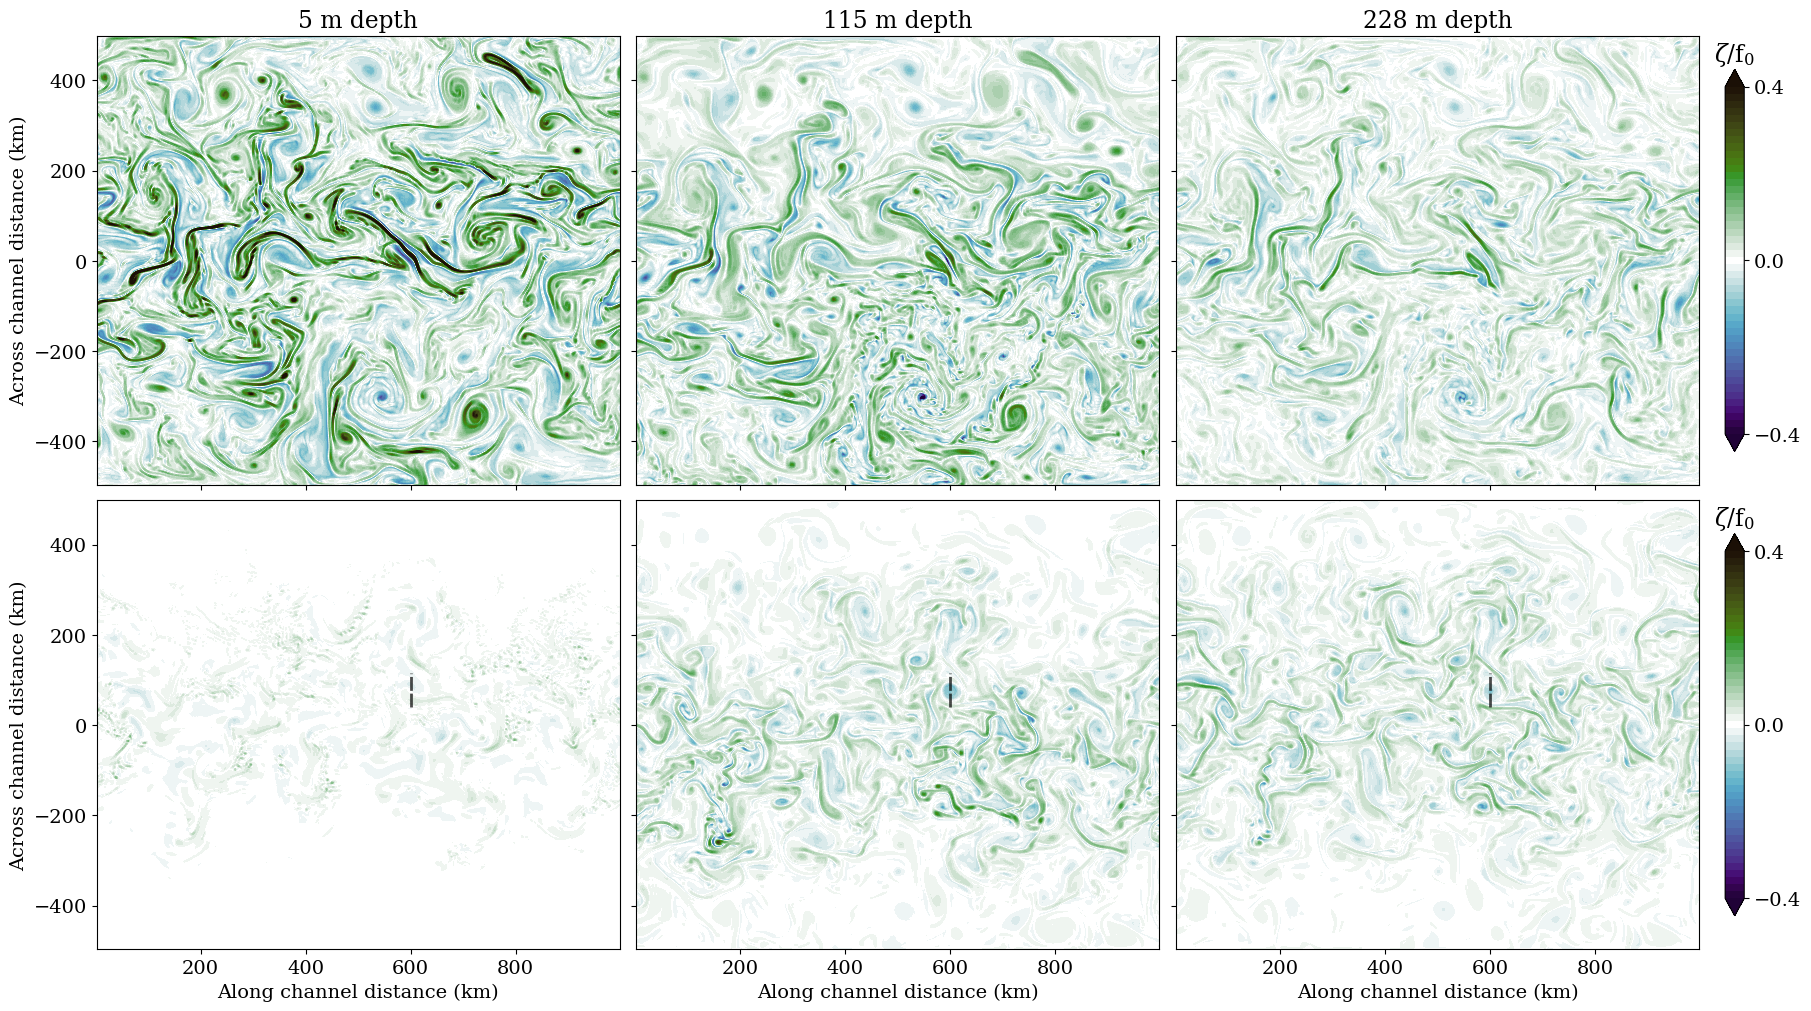

In [19]:
# panel of snapshots, twice as many depths as the above figure

# print the index of the selected ts
myTs = 1
print(f"ts index = {ts[myTs]}")
nLevs = len(levs)

fig, axs = plt.subplots(2,nLevs,figsize=(18,10),
                        sharey=True, sharex=True,
                        layout="constrained")

comboContourLevs = np.linspace(-0.4,0.4,50)

for iz in range(nLevs):
    im1 = axs[0,iz].contourf(xGrid,yGrid,
                             vortSnapshots[0,myTs,iz,:,:],
                             comboContourLevs,
                             extend="both", cmap=myCmap)
    axs[0,iz].set_title(f"{-depth[levs[iz]].round(0).astype(int)} m depth")

for iz in range(nLevs):
    im3 = axs[-1,iz].contourf(xGrid,yGrid,
                             vortSnapshots[-1,myTs,iz,:,:],
                             comboContourLevs,
                             extend="both", cmap=myCmap)
    axs[-1,iz].set_xlabel("Along channel distance (km)")
    axs[-1,iz].vlines(600,40,115,
                    colors="black", linewidth=2, alpha=0.7,
                    linestyles=(0, (5, 1)))

cbar1 = plt.colorbar(im1, ax=axs[0,-1],
                     shrink=0.85,
                     ticks=[-0.4,0,0.4])
cbar2 = plt.colorbar(im3, ax=axs[-1,-1],
                     shrink=0.85,
                     ticks=[-0.4,0,0.4])

# cbar1.ax.set_yticklabels([str(-freeMax.round(2)), "0", str(freeMax.round(2))])
# cbar2.ax.set_yticklabels([str(-iceMax.round(2)), "0", str(iceMax.round(2))])
cbar1.ax.set_title("$\zeta / \mathrm{f}_0$")
cbar2.ax.set_title("$\zeta / \mathrm{f}_0$")

axs[0,0].set_ylabel("Across channel distance (km)")
axs[1,0].set_ylabel("Across channel distance (km)")

# plt.savefig(saveLoc+"officialFigs/figVortSnapshots.pdf",
            # format="pdf", bbox_inches='tight')
# plt.savefig(saveLoc+"officialFigs/figVortSnapshots.png",
            # format="png", bbox_inches='tight')


##### 

ts index = 60


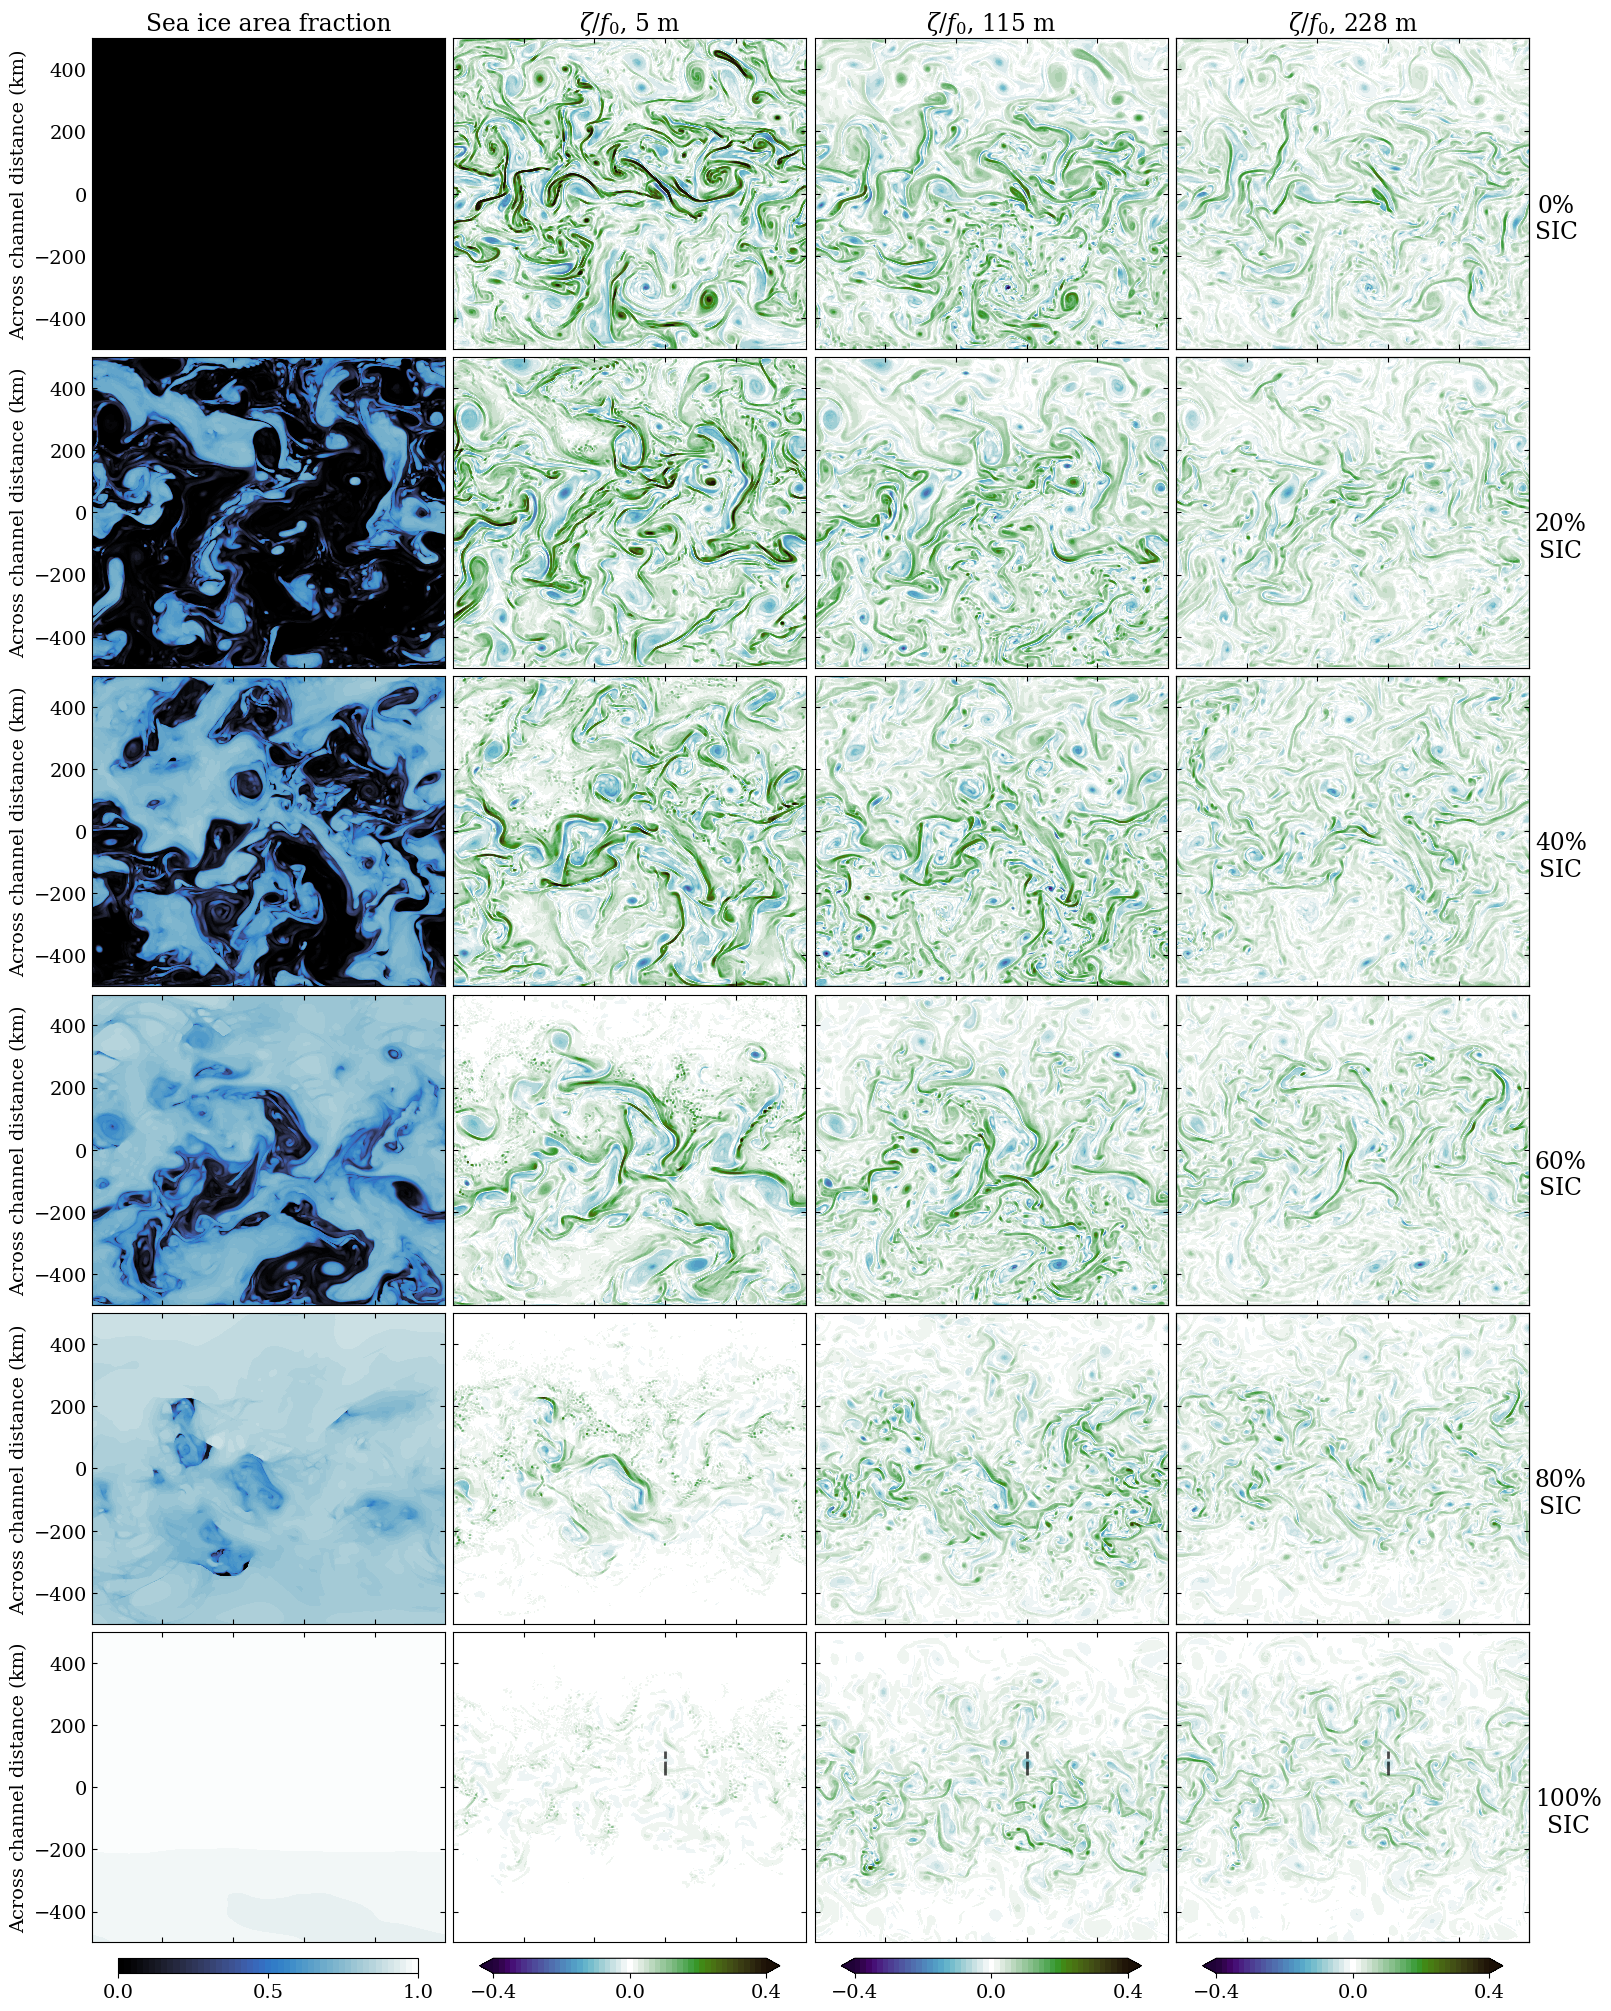

In [20]:
# panel of snapshots, all concentrations
# including sea ice field

# print the index of the selected ts
myTs = 1
print(f"ts index = {ts[myTs]}")
nLevs = len(levs)

fig, axs = plt.subplots(6,1+nLevs,figsize=(16,20),
                        sharey=True, sharex=True,
                        layout="constrained")

comboContourLevs = np.linspace(-0.4,0.4,50)
iceContourLevs = np.linspace(0,1,50)

for iz in range(nLevs):
  for ic in range(6):
    im1 = axs[ic,iz+1].contourf(xGrid,yGrid,
                               vortSnapshots[ic,myTs,iz,:,:],
                               comboContourLevs,
                               extend="both", cmap=myCmap)

for iz in range(nLevs):
  axs[-1,iz+1].vlines(600,40,115,
                     colors="black", linewidth=2, alpha=0.7,
                     linestyles=(0, (5, 1)))

for ic in range(6):
  imIce = axs[ic,0].contourf(xGridIce,yGridIce,
                             iceSnapshots[ic,myTs,:,:],iceContourLevs,
                             cmap=iceCmap)

cbar = plt.colorbar(imIce,ax=axs[-1,0],shrink=0.85,location='bottom',
                   ticks=[0,0.5,1])
for iz in range(nLevs):
  cbar = plt.colorbar(im1, ax=axs[-1,iz+1],shrink=0.85,ticks=[-0.4,0,0.4],
                     location='bottom')

for iz in range(nLevs):
  axs[0,iz+1].set_title("$\zeta/f_0$, "+f"{-depth[levs[iz]].round(0).astype(int)} m")
axs[0,0].set_title("Sea ice area fraction")
for ic in range(6):
  axs[ic,0].set_ylabel("Across channel distance (km)")
  leftAx = axs[ic,-1].twinx()
  leftAx.tick_params(labelright=False,right=False,direction='in')
  leftAx.set_ylabel(f"{conc[ic]}%\nSIC",rotation=0,size='large',
                   multialignment='center',horizontalalignment='left')

for xSubplot in range(nLevs+1):
  for ySubplot in range(6):
    axs[ySubplot,xSubplot].tick_params(right=True,left=True,top=True,bottom=True,
                                       direction='in',labelbottom=False)

plt.savefig(saveLoc+"officialFigs/figVortSnapshots-FullGrid.pdf",bbox_inches='tight')
plt.savefig(saveLoc+"officialFigs/figVortSnapshots-FullGrid.png",bbox_inches='tight')
